In [1]:
%pylab inline
import torch
# Making sure we can find the data loader
import sys
sys.path.append('..')
sys.path.append('../..')
from data import load

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
# Let's load the dataset
train_data, train_label = load.get_dogs_and_cats_data(resize=(32,32), n_images=100)
input_size = 32*32*3
to_image = load.to_image_transform()

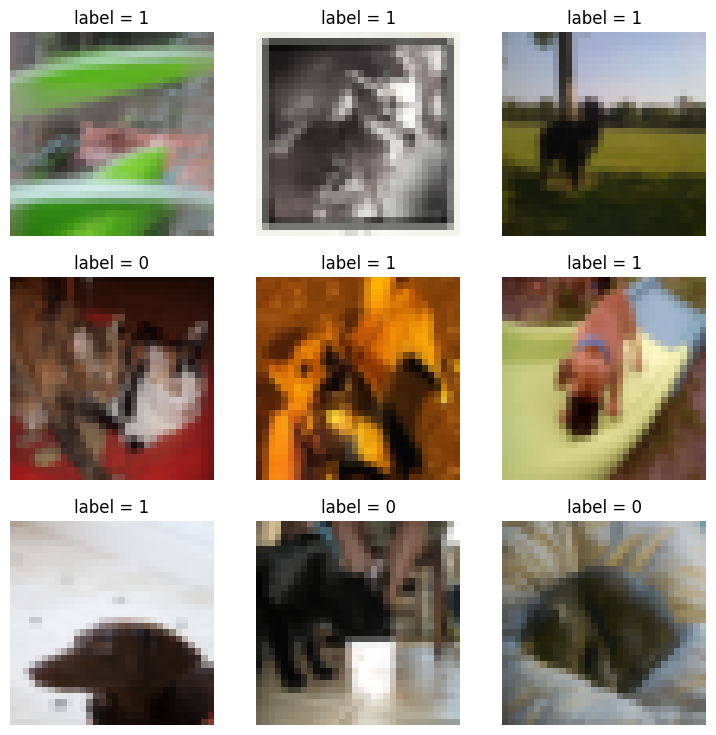

In [3]:
figure(figsize=(9,9))
# Plot the first 9 images (all cats)
for i, (data, label) in enumerate(zip(train_data[:9],train_label[:9])):
    subplot(3,3,1+i)
    imshow(to_image(data))
    title('label = %d'%label)
    axis('off')

In [4]:
class Network1(torch.nn.Module):
    def __init__(self, n_hidden=100):
        super().__init__()
        self.linear1 = torch.nn.Linear(input_size, n_hidden)
        self.activation = torch.nn.ReLU()
        self.linear2 = torch.nn.Linear(n_hidden, 1)
    
    def forward(self, x):
        return self.linear2(self.activation(self.linear1(x.view(x.size(0), -1))))


In [5]:
# Create the network
net1 = Network1(100)
# Run an image through it
print( net1(train_data).view(-1).detach().numpy() )

[-0.11666452 -0.01218061 -0.02647986 -0.05582439 -0.06884713 -0.07426661
 -0.11988138 -0.1508754  -0.09473266 -0.10555119 -0.11205442 -0.07451358
 -0.0114538  -0.03645098 -0.06230658 -0.05653633 -0.20482528 -0.10789528
 -0.09619182 -0.07970785 -0.12600176 -0.05568714  0.00681441 -0.14392285
 -0.12056908 -0.12222722 -0.10236578 -0.24464132 -0.04859121 -0.20569515
 -0.09635501 -0.09910933 -0.19064035 -0.03423431 -0.08156552 -0.15408464
 -0.02703031 -0.14437844 -0.12504634 -0.1360234  -0.06810249 -0.0230343
 -0.20682594 -0.05603386 -0.14723194 -0.14903176 -0.04260117 -0.06173945
 -0.0771127  -0.07101672 -0.13693443 -0.16763532 -0.12506317 -0.0840079
 -0.08369774 -0.00672981  0.00092466 -0.07512563  0.00588925 -0.10326148
  0.01207101 -0.14386982 -0.09098267 -0.18191543 -0.12514006  0.01794229
 -0.17029686 -0.19610392 -0.11749545 -0.10202523 -0.11068309 -0.0528039
 -0.06975032 -0.06040952 -0.03295252 -0.06511676 -0.13189809 -0.06583469
 -0.04055259 -0.0561346  -0.02101819 -0.03989616 -0.05

In [6]:
class Network2(torch.nn.Module):
    def __init__(self, *hidden_size):
        super().__init__()
        layers = []
        # Add the hidden layers
        n_in = input_size
        for n_out in hidden_size:
            layers.append(torch.nn.Linear(n_in, n_out))
            layers.append(torch.nn.ReLU())
            n_in = n_out
        
        # Add the classifier
        layers.append(torch.nn.Linear(n_out, 1))
        self.network = torch.nn.Sequential(*layers)
    
    def forward(self, x):
        return self.network(x.view(x.size(0), -1))

In [7]:
# Create the network
net2 = Network2(100, 50, 50)
# Run an image through it
print( net2(train_data).view(-1).detach().numpy() )

[-0.03342889 -0.0351971  -0.02820556 -0.06019168 -0.04007806 -0.05432146
 -0.04470311 -0.03901586 -0.04551048 -0.03731422 -0.05093319 -0.03082472
 -0.0259193  -0.04776499 -0.04250351 -0.029782   -0.03178665 -0.03900372
 -0.04654014 -0.03617655 -0.03003443 -0.04539562 -0.02983748 -0.03075305
 -0.03199217 -0.0243466  -0.054005   -0.03918456 -0.03946443 -0.05627764
 -0.04166208 -0.02576187 -0.03961597 -0.04083673 -0.03986252 -0.03892076
 -0.0456367  -0.03987778 -0.06198189 -0.03728481 -0.03155395 -0.036805
 -0.03400616 -0.04274697 -0.04948325 -0.05085205 -0.04161504 -0.01854287
 -0.04013046 -0.06409714 -0.04915904 -0.02758344 -0.04848149 -0.03329031
 -0.04119885 -0.03161262 -0.03294888 -0.04454168 -0.02716818 -0.05270016
 -0.01403332 -0.04991054 -0.03975805 -0.05376447 -0.04529271 -0.0293345
 -0.04886403 -0.04442658 -0.0296757  -0.03936881 -0.04778569 -0.05143041
 -0.03218606 -0.03332945 -0.0312345  -0.03794158 -0.04582901 -0.06189429
 -0.04525457 -0.03291155 -0.03706281 -0.02100243 -0.03

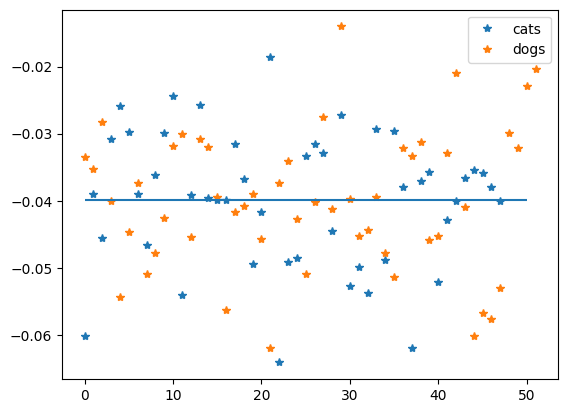

In [8]:
plot( net2(train_data[train_label==0]).view(-1).detach().numpy(), '*', label='cats')
plot( net2(train_data[train_label==1]).view(-1).detach().numpy(), '*', label='dogs')
hlines(net2(train_data).detach().numpy().mean(), 0, 50)
legend()